In [1]:
import pandas as pd
import tensorflow
import numpy as np

In [2]:
df=pd.read_csv("/content/drive/MyDrive/news_data.csv")

In [3]:
df.head()

,title,media,date,datetime,desc,link,img
0,Vigils take place across country in support of...,RTE,1 hour ago,2023-12-31 17:20:51.575360,NaN,https://www.rte.ie/news/dublin/2023/1231/14242...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,Palestine Chronicle,2 hours ago,2023-12-31 16:20:51.590217,NaN,https://www.palestinechronicle.com/gaza-live-b...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,John Pilger: Veteran journalist and Palestine ...,Middle East Eye,3 hours ago,2023-12-31 15:20:51.603177,NaN,https://www.middleeasteye.net/news/john-pilger...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Injured Palestinian boy in Gaza no longer reco...,YouTube,3 hours ago,2023-12-31 15:20:51.616537,NaN,https://www.youtube.com/watch%3Fv%3D21dsdfvTtw...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Walkout over weapons: British school students ...,Al Jazeera,3 hours ago,2023-12-31 15:20:51.629160,NaN,https://www.aljazeera.com/features/2023/12/31/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [4]:
data=df.drop(['desc','img'],axis=1)

In [5]:
data.head()

,title,media,date,datetime,link
0,Vigils take place across country in support of...,RTE,1 hour ago,2023-12-31 17:20:51.575360,https://www.rte.ie/news/dublin/2023/1231/14242...
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,Palestine Chronicle,2 hours ago,2023-12-31 16:20:51.590217,https://www.palestinechronicle.com/gaza-live-b...
2,John Pilger: Veteran journalist and Palestine ...,Middle East Eye,3 hours ago,2023-12-31 15:20:51.603177,https://www.middleeasteye.net/news/john-pilger...
3,Injured Palestinian boy in Gaza no longer reco...,YouTube,3 hours ago,2023-12-31 15:20:51.616537,https://www.youtube.com/watch%3Fv%3D21dsdfvTtw...
4,Walkout over weapons: British school students ...,Al Jazeera,3 hours ago,2023-12-31 15:20:51.629160,https://www.aljazeera.com/features/2023/12/31/...


In [6]:
data.shape

(1950, 5)

In [7]:
data['media'].value_counts()

YouTube                     246
Middle East Monitor         163
Middle East Eye             142
Al Jazeera                  130
The Times of India           91
Ynetnews                     65
Palestine Chronicle          65
RTE                          65
Arab News                    65
IOL                          65
WION                         52
Tehran Times                 52
The Hindu                    52
Global News                  52
La Prensa Latina             52
Ventura County Star          52
MSN                          52
Fox News                     39
The Wall Street Journal      39
BBC                          36
Get French Football News     33
Reuters                      33
The Irish News               26
Armenpress                   26
NBC News                     26
India Today NE               26
Evening Standard             26
Outlook India                26
Lanka Times                  24
The Guardian                 17
ReliefWeb                    15
The Indi

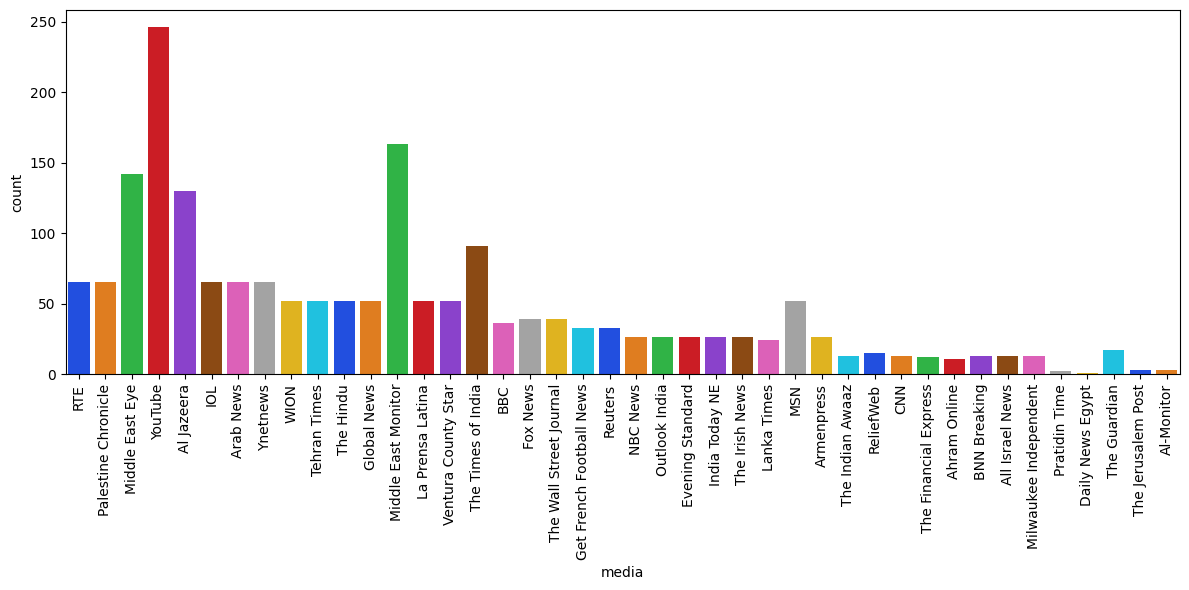

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='media',data=data,palette="bright")
plt.xticks(rotation=90)
plt.tight_layout()
fig=plt.show()


In [11]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00


In [12]:
# TESTING VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Instantiate the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Iterating through the first 10 titles in the 'title' column
for i in range(10):
    # Selecting the title at the current index
    current_title = data['title'][i]

    # Printing the current title
    print(f"\nTitle {i + 1}: {current_title}")

    # Analyzing the sentiment of the title
    sentiment_scores = analyzer.polarity_scores(current_title)

    # Printing the sentiment scores
    print("Sentiment Scores:", sentiment_scores)

    # Determining the sentiment label based on the compound score
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        sentiment_label = 'Positive'
    elif compound_score <= -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'

    # Printing the sentiment label
    print("Sentiment Label:", sentiment_label)



Title 1: Vigils take place across country in support of Gaza
Sentiment Scores: {'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'compound': 0.4019}
Sentiment Label: Positive

Title 2: GAZA LIVE BLOG - Israel Bombs Two Mosques in Central Gaza | Massacres in Nuseirat, Maghazi | Battles Continue in ...
Sentiment Scores: {'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'compound': -0.3818}
Sentiment Label: Negative

Title 3: John Pilger: Veteran journalist and Palestine supporter dies
Sentiment Scores: {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'compound': 0.2732}
Sentiment Label: Positive

Title 4: Injured Palestinian boy in Gaza no longer recognises his own face | Al Jazeera NewsFeed
Sentiment Scores: {'neg': 0.274, 'neu': 0.726, 'pos': 0.0, 'compound': -0.5994}
Sentiment Label: Negative

Title 5: Walkout over weapons: British school students battle Gaza protest curbs
Sentiment Scores: {'neg': 0.62, 'neu': 0.38, 'pos': 0.0, 'compound': -0.8316}
Sentiment Label: Negative

Title 6: 'This is a struggle of l

In [13]:
#testing of sentiments on vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
current_title="israel is commiting war crimes"
sentiment_scores = analyzer.polarity_scores(current_title)

print(sentiment_scores)

{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'compound': -0.5994}


In [14]:
pip install transformers

In [15]:
#testing roBERTo
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [28]:
#example test for bert
txt="israel is commiting a genocide in gaza"
print(txt)
encoded_text=tokenizer(txt,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'bert_neg':scores[0],
    'bert_neu':scores[1],
    'bert_pos':scores[2]
}
print(scores_dict)

israel is commiting a genocide in gaza
{'bert_neg': 0.9140295, 'bert_neu': 0.083115794, 'bert_pos': 0.0028548143}


## Function for roBERTa model to check sentiment of each content in **DF**

In [41]:
def polarity_bert(text):

  encoded_text=tokenizer(text,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'bert_neg':scores[0],
    'bert_neu':scores[1],
    'bert_pos':scores[2]
  }
  print(text)
  print(scores_dict)
  return scores_dict

In [42]:
test=data.copy()

In [43]:
#test
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'text' containing the text data
test['sentiment_scores'] = test['title'].apply(polarity_bert)

# Expand the dictionary into separate columns
test[['bert_neg', 'bert_neu', 'bert_pos']] = pd.DataFrame(test['sentiment_scores'].tolist(), index=test.index)

# Drop the 'sentiment_scores' column if you no longer need it
test = test.drop('sentiment_scores', axis=1)


Vigils take place across country in support of Gaza
{'bert_neg': 0.097925454, 'bert_neu': 0.8137135, 'bert_pos': 0.08836106}
GAZA LIVE BLOG - Israel Bombs Two Mosques in Central Gaza | Massacres in Nuseirat, Maghazi | Battles Continue in ...
{'bert_neg': 0.757525, 'bert_neu': 0.23430291, 'bert_pos': 0.008172068}
John Pilger: Veteran journalist and Palestine supporter dies
{'bert_neg': 0.75262386, 'bert_neu': 0.23979895, 'bert_pos': 0.0075771986}
Injured Palestinian boy in Gaza no longer recognises his own face | Al Jazeera NewsFeed
{'bert_neg': 0.79983735, 'bert_neu': 0.195187, 'bert_pos': 0.0049756444}
Walkout over weapons: British school students battle Gaza protest curbs
{'bert_neg': 0.47587225, 'bert_neu': 0.5109771, 'bert_pos': 0.01315065}
'This is a struggle of land occupation': Over 300 unite at interfaith vigil in solidarity with Palestine
{'bert_neg': 0.043700874, 'bert_neu': 0.68907213, 'bert_pos': 0.26722702}
Israeli strike kills former Palestinian minister: agency
{'bert_ne

In [44]:
test.head()

,title,media,date,datetime,link,bert_neg,bert_neu,bert_pos
0,Vigils take place across country in support of...,RTE,1 hour ago,2023-12-31 17:20:51.575360,https://www.rte.ie/news/dublin/2023/1231/14242...,0.097925,0.813713,0.088361
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,Palestine Chronicle,2 hours ago,2023-12-31 16:20:51.590217,https://www.palestinechronicle.com/gaza-live-b...,0.757525,0.234303,0.008172
2,John Pilger: Veteran journalist and Palestine ...,Middle East Eye,3 hours ago,2023-12-31 15:20:51.603177,https://www.middleeasteye.net/news/john-pilger...,0.752624,0.239799,0.007577
3,Injured Palestinian boy in Gaza no longer reco...,YouTube,3 hours ago,2023-12-31 15:20:51.616537,https://www.youtube.com/watch%3Fv%3D21dsdfvTtw...,0.799837,0.195187,0.004976
4,Walkout over weapons: British school students ...,Al Jazeera,3 hours ago,2023-12-31 15:20:51.629160,https://www.aljazeera.com/features/2023/12/31/...,0.475872,0.510977,0.013151


In [48]:
#reorder
# Reorder columns with 'text' first, followed by sentiment polarity columns
column_order = ['title', 'bert_neg', 'bert_neu', 'bert_pos','media' ,'date' ,	'datetime' 	]
test = test[column_order]

# Display the updated DataFrame
print(test.head())


KeyError: "['media', 'date', 'datetime'] not in index"

In [47]:
test.head()

,title,bert_neg,bert_neu,bert_pos
0,Vigils take place across country in support of...,0.097925,0.813713,0.088361
1,GAZA LIVE BLOG - Israel Bombs Two Mosques in C...,0.757525,0.234303,0.008172
2,John Pilger: Veteran journalist and Palestine ...,0.752624,0.239799,0.007577
3,Injured Palestinian boy in Gaza no longer reco...,0.799837,0.195187,0.004976
4,Walkout over weapons: British school students ...,0.475872,0.510977,0.013151
